<a href="https://colab.research.google.com/github/Harshitt-10/Colab/blob/main/Linear_Regression_own.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Dummy Data HSS.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [3]:
df_encoded = pd.get_dummies(df, columns=['Influencer'], drop_first=True)
df_encoded.dropna()

,TV,Radio,Social Media,Sales,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,True,False,False
1,13.0,9.237765,2.409567,46.677897,True,False,False
2,41.0,15.886446,2.913410,150.177829,True,False,False
3,83.0,30.020028,6.922304,298.246340,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,True,False
...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866,False,True,False
4568,71.0,20.610685,6.545573,249.101915,False,False,True
4569,44.0,19.800072,5.096192,163.631457,False,True,False
4570,71.0,17.534640,1.940873,253.610411,False,False,False


In [4]:
X = df_encoded.drop('Sales', axis=1)
y = df_encoded['Sales']

Learned parameters (theta): [-0.10330365  3.56256452 -0.00390781  0.00446408  0.01160258 -0.05688132
 -0.07389787]
Mean Squared Error: 8.692537795362531


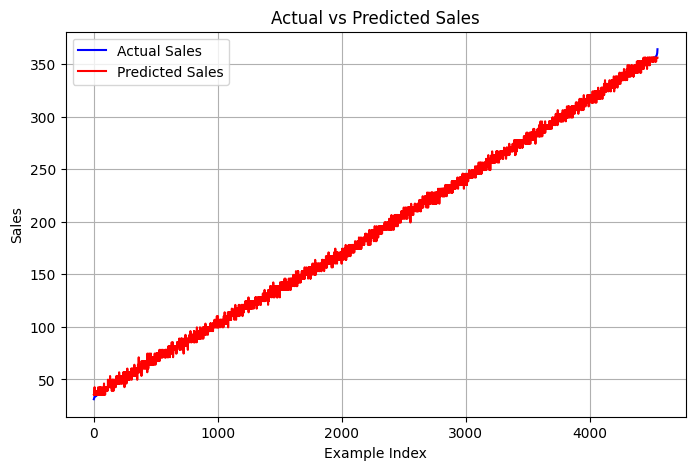

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the dataset
df = pd.read_csv("Dummy Data HSS.csv")  # Ensure this CSV is in your current directory

df_encoded = pd.get_dummies(df, columns=['Influencer'], drop_first=True)
df_encoded.dropna(inplace=True)
df_encoded['Influencer_Mega'] = df_encoded['Influencer_Mega'].map({True: 1, False: 0})
df_encoded['Influencer_Micro'] = df_encoded['Influencer_Micro'].map({True: 1, False: 0})
df_encoded['Influencer_Nano'] = df_encoded['Influencer_Nano'].map({True: 1, False: 0})

# 2. Feature matrix X and target vector y
X = df_encoded[['TV', 'Radio', 'Social Media', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']].values.astype(float)   # shape: (m, n)
y = df_encoded['Sales'].values.reshape(-1, 1).astype(float)         # shape: (m, 1)
m = X.shape[0]  # number of samples

# 3. Add intercept term to X
X_b = np.c_[np.ones((m, 1)), X]  # shape: (m, n+1)

# 4. Compute theta using Normal Equation: θ = (XᵀX)^(-1)Xᵀy
theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# 5. Predictions
y_pred = X_b @ theta

# 6. Evaluate: Mean Squared Error
mse = np.mean((y_pred - y) ** 2)
print("Learned parameters (theta):", theta.ravel())
print("Mean Squared Error:", mse)

# 7. Plot actual vs predicted
# plt.figure(figsize=(8, 5))
# plt.scatter(range(m), y, color='blue', label='Actual Sales')
# plt.plot(range(m), y_pred, color='red', label='Predicted Sales')
sorted_idx = np.argsort(y.ravel())

plt.figure(figsize=(8, 5))
plt.plot(y[sorted_idx], color='blue', label='Actual Sales')
plt.plot(y_pred[sorted_idx], color='red', label='Predicted Sales')

plt.title("Actual vs Predicted Sales")
plt.xlabel("Example Index")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()